In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, chi2, SelectPercentile, mutual_info_regression
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import LocalOutlierFactor
import math
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
SEED = 4426008 #np.random.randint(2**32)
np.random.seed(SEED)

In [3]:
just_scoring = False
if just_scoring:
  folder = "just_scoring/"
else:
  folder = "testing/"
folder = folder + ""
raw = folder + "outlier_detected/" #"feature_reduced/"
preprocessed = folder + "feature_reduced2/"

In [4]:
x_train = pd.read_csv(raw + 'X_train_preprocessed.csv',index_col=['id'])
x_test = pd.read_csv(raw + 'X_test_preprocessed.csv',index_col=['id'])
y_train = pd.read_csv(raw + 'y_train_preprocessed.csv',index_col=['id'])
y_test = pd.read_csv(raw + 'y_test_preprocessed.csv',index_col=['id'])

In [5]:
%%time
from sklearn.feature_selection import RFECV
estimator = ExtraTreesRegressor(n_estimators = 1000, n_jobs=-1)
selector = RFECV(estimator, n_jobs=-1)
selector.fit(np.array(x_train), np.array(y_train).squeeze())
cols_etr = selector.get_support(indices=True)

x_train_etr = x_train.iloc[:, cols_etr]
x_test_etr = x_test[[col for col in x_train_etr.columns]]

CPU times: total: 1d 3h 47min 54s
Wall time: 15h 12min 17s


C:\Users\david\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


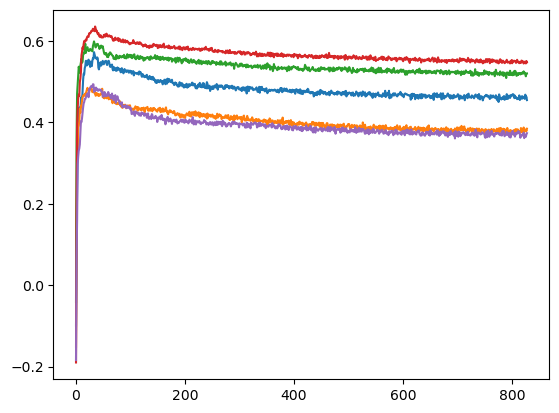

In [11]:
rfecv = selector
plt.plot(
    range(len(rfecv.grid_scores_)),
    rfecv.grid_scores_,
)
plt.show()

In [7]:
x_train_etr.to_csv(preprocessed + 'X_train_etr_preprocessed.csv',index_label="id")
x_test_etr.to_csv(preprocessed + 'X_test_etr_preprocessed.csv',index_label="id")
y_train.to_csv(preprocessed + 'y_train_preprocessed.csv',index_label="id")
y_test.to_csv(preprocessed + 'y_test_preprocessed.csv',index_label="id")

In [8]:
x_test_etr

,x92,x115,x133,x159,x194,x200,x209,x242,x306,x309,...,x548,x640,x641,x642,x654,x702,x720,x726,x742,x828
id,,,,,,,,,,,,,,,,,,,,,
0.0,-0.717483,-0.472708,0.425056,-0.402227,0.262078,-0.113843,0.199054,1.024244,0.881937,-0.139382,...,-0.082311,-0.619467,0.249418,-0.220531,-0.004358,-0.431456,0.676839,0.873743,0.324621,0.123517
1.0,-0.394855,0.586679,-0.437410,0.634064,-0.083928,0.365533,-0.439955,-0.643854,-0.106881,0.879927,...,0.532855,0.057314,1.028487,0.448805,-0.108897,1.024698,0.517196,0.447579,-0.166334,0.293542
2.0,-0.217649,-0.149037,-0.242645,-0.002100,-0.125459,-0.506501,0.692387,-0.177487,-0.888786,-1.007530,...,0.148359,-0.465190,-0.076115,0.175181,-0.188988,0.267573,-0.926866,-1.041702,-0.724694,-1.179448
3.0,0.295681,-0.303512,-0.694777,-0.315867,-0.634577,-0.563929,-1.933655,-1.172118,0.075084,-0.618207,...,0.576217,-0.906515,0.108415,1.390667,-0.949870,-0.454243,-0.996262,-0.798283,-1.111161,1.048497
4.0,-0.694755,-0.354893,0.155082,1.205560,-0.803079,-0.985037,0.284815,0.440599,-0.262896,-0.082962,...,-0.762503,0.212281,-0.120148,-1.335124,-0.614567,2.066473,0.353310,0.127927,0.019199,-0.505498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771.0,-0.438633,-0.400847,-0.166067,-0.579429,-0.848006,-0.366065,-0.638824,-0.383356,0.008709,0.137175,...,0.233885,-0.292194,-0.655990,-0.566594,0.178756,-0.749656,0.009499,0.087345,0.533634,-1.339742
772.0,0.275673,0.001983,-0.857579,0.369203,-0.869076,0.475206,0.555398,-1.067129,-0.732741,-0.357001,...,-0.056626,-0.204693,0.759343,0.973524,-0.331681,0.003558,-0.351149,-0.188562,-0.695897,0.334575
773.0,0.212194,0.451662,0.440954,0.617131,0.116341,0.590979,0.333999,0.400288,-0.173069,-0.435274,...,-0.299272,-0.284225,0.808710,0.298435,0.113599,0.444809,-0.041109,0.408794,-0.107164,0.092632
